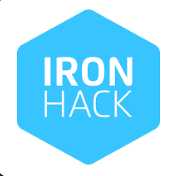

<h1 style="color: #00BFFF;">First project</h1>

<h1 style="color: #00BFFF;">00 |</h1>

In [7]:
# pip install matplotlib
# pip install seaborn

In [1]:
# 📚 libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas
import requests
import time


import matplotlib.pyplot as plt

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [5]:
#Import Shein data from rapid api
import requests

url = "https://shein-scraper-api.p.rapidapi.com/shein/search/products"

querystring = {"keywords":"men shoes","sort":"recommend","size":"22","page":"1","country":"us","language":"en","currency":"usd"}

headers = {
	"x-rapidapi-key": "48daa13d70msh845fe4b25e63c0ap1c3c8cjsnff689e6d8ced",
	"x-rapidapi-host": "shein-scraper-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

In [7]:
#Retrieving more than 250 datapoints by looping through 13 pages, used parts of stacked overflow code

keywords='shoes'
page=1
df = []
while page <= 13:
    try:
        querystring = {
            "keywords": keywords,
            "sort": "recommend",
            "page": str(page),  # Incrementing page number for each request
            "country": "us",
            "language": "en",
            "currency": "usd"
        }
       
        response = requests.get(url, headers=headers, params=querystring)
        
        if response.status_code == 200:
            response_json = response.json()

            if 'data' in response_json:
                
                next_page = pd.DataFrame(response_json['data'])

                if len(next_page) == 0:
                    break
                
                df.append(next_page)

                # Increment the page number for the next iteration
                page += 1
            else:
                print(f"No data found on page {page}")
                break
        else:
            print(f"Error fetching data for page {page}: {response.status_code}")
            break
      
        time.sleep(1) # Delay to avoid hitting API rate limits
    
    except Exception as e:
        print(f"Error occurred: {e}")
        break

df = pd.concat(df, axis=0, ignore_index=True) # Concatenate all pages into one final DataFrame
df.shape 

(286, 51)

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [9]:
df.sample()

,spu,soldOutStatus,productStockCheckLog,goods_id,goods_sn,productRelationID,goods_img,detail_image,goods_name,goods_url_name,cat_id,cate_name,stock,store_code,business_model,mall_code,is_on_sale,retailPrice,salePrice,discountPrice,isInversion,retailDiscountPrice,retailDiscountPercent,isNewCoupon,suggestedSalePrice,unit_discount,original_discount,promotionInfo,featureSubscript,premiumFlagNew,productInfoLabels,quickship,coupon_prices,video_url,relatedColor,relatedColorNew,is_clearance,productMaterial,is_show_plus_size,actTagFromCcc,comment_num_show,comment_rank_average,comment_num,percent_overall_fit,is_single_sku,isShowAdditionalDiscount,usePositionInfo,rankInfo,tag_3p_label_name,sellingPoint,spu_images
89,x24031204344,False,"goodsId| 32649139, goodsSn| sx2403120434415415...",32649139,sx2403120434415415,x24031204344,http://img.ltwebstatic.com/images3_pi/2024/04/...,[http://img.ltwebstatic.com/images3_pi/2024/04...,Women's Comfortable Slip-Resistant Casual Spor...,Women-s-Comfortable-Slip-Resistant-Casual-Spor...,1913,Women Casual Shoes,1,5158705593,3,1,1,"{'amount': '18.70', 'amountWithSymbol': '$18.7...","{'amount': '11.59', 'amountWithSymbol': '$11.5...","{'amount': '7.11', 'amountWithSymbol': '$7.11'...",0,"{'amount': '7.11', 'amountWithSymbol': '$7.11'...",38,0,"{'amount': '0.00', 'amountWithSymbol': '$0.00'...",38,22,"[{'typeId': '31', 'id': '5432223', 'mall_code'...",[],{},{},0,[],0,[],[{'colorImage': 'http://img.ltwebstatic.com/im...,0,{'pictureBelt': {'oneColumnStyle': {'materialV...,0,"{'productDetailStyle': [], 'productDetailCartS...",100‎+,4.91,327,"{'true_size': '92%', 'large': '0%', 'small': '...",0,0,1,NaN,NaN,NaN,NaN


<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [11]:
# To flatten (extend) nested dictionary 
df_normal=pd.json_normalize(df.to_dict(orient='records'))
df_normal

,spu,soldOutStatus,productStockCheckLog,goods_id,goods_sn,productRelationID,goods_img,detail_image,goods_name,goods_url_name,cat_id,cate_name,stock,store_code,business_model,mall_code,is_on_sale,isInversion,retailDiscountPercent,isNewCoupon,unit_discount,original_discount,promotionInfo,featureSubscript,quickship,coupon_prices,video_url,relatedColor,relatedColorNew,is_clearance,is_show_plus_size,comment_num_show,comment_rank_average,comment_num,is_single_sku,isShowAdditionalDiscount,usePositionInfo,rankInfo,tag_3p_label_name,sellingPoint,spu_images,retailPrice.amount,retailPrice.amountWithSymbol,retailPrice.usdAmount,retailPrice.usdAmountWithSymbol,retailPrice.priceShowStyle,salePrice.amount,salePrice.amountWithSymbol,salePrice.usdAmount,salePrice.usdAmountWithSymbol,salePrice.priceShowStyle,discountPrice.amount,discountPrice.amountWithSymbol,discountPrice.usdAmount,discountPrice.usdAmountWithSymbol,discountPrice.priceShowStyle,retailDiscountPrice.amount,retailDiscountPrice.amountWithSymbol,retailDiscountPrice.usdAmount,retailDiscountPrice.usdAmountWithSymbol,retailDiscountPrice.priceShowStyle,suggestedSalePrice.amount,suggestedSalePrice.amountWithSymbol,suggestedSalePrice.usdAmount,suggestedSalePrice.usdAmountWithSymbol,suggestedSalePrice.priceShowStyle,productMaterial.pictureBelt.oneColumnStyle,productMaterial.pictureBelt.twoColumnStyle,productMaterial.upperRightPositionInfo.oneColumnStyle.contentType,productMaterial.upperRightPositionInfo.oneColumnStyle.displayType,productMaterial.upperRightPositionInfo.oneColumnStyle.image,productMaterial.upperRightPositionInfo.oneColumnStyle.labelLang,productMaterial.upperRightPositionInfo.oneColumnStyle.fontColor,productMaterial.upperRightPositionInfo.oneColumnStyle.backgroundColor,productMaterial.upperRightPositionInfo.oneColumnStyle.appTraceInfo,productMaterial.upperRightPositionInfo.twoColumnStyle.contentType,productMaterial.upperRightPositionInfo.twoColumnStyle.displayType,productMaterial.upperRightPositionInfo.twoColumnStyle.image,productMaterial.upperRightPositionInfo.twoColumnStyle.labelLang,productMaterial.upperRightPositionInfo.twoColumnStyle.fontColor,productMaterial.upperRightPositionInfo.twoColumnStyle.backgroundColor,productMaterial.upperRightPositionInfo.twoColumnStyle.appTraceInfo,productMaterial.lowerRightPositionInfo.oneColumnStyle.contentType,productMaterial.lowerRightPositionInfo.oneColumnStyle.appTraceInfo,productMaterial.lowerRightPositionInfo.twoColumnStyle.contentType,productMaterial.lowerRightPositionInfo.twoColumnStyle.appTraceInfo,productMaterial.productAttributeLabelList,productMaterial.showAddButtonLabel,productMaterial.showAddButtonLabelStyle,actTagFromCcc.productDetailStyle,actTagFromCcc.productDetailCartStyle,actTagFromCcc.overviewCarStyle,actTagFromCcc.oneColumnStyle.tagType,actTagFromCcc.oneColumnStyle.subscriptType,actTagFromCcc.oneColumnStyle.actionDataTagShow,actTagFromCcc.oneColumnStyle.tagName,actTagFromCcc.oneColumnStyle.tagColor,actTagFromCcc.oneColumnStyle.bgColor,actTagFromCcc.oneColumnStyle.icon,actTagFromCcc.oneColumnStyle.tagId,actTagFromCcc.oneColumnStyle.appTraceInfo,actTagFromCcc.oneColumnStyle.rankTypeText,actTagFromCcc.oneColumnStyle.composeIdText,actTagFromCcc.oneColumnStyle.routeUrl,actTagFromCcc.oneColumnStyle.carrierSubType,actTagFromCcc.oneColumnStyle.carrierId,actTagFromCcc.oneColumnStyle.materialValueKey,actTagFromCcc.oneColumnStyle.title,actTagFromCcc.oneColumnStyle.score,actTagFromCcc.oneColumnStyle.cateId,actTagFromCcc.oneColumnStyle.boardGenerateType,actTagFromCcc.twoColumnStyle.tagType,actTagFromCcc.twoColumnStyle.subscriptType,actTagFromCcc.twoColumnStyle.actionDataTagShow,actTagFromCcc.twoColumnStyle.tagName,actTagFromCcc.twoColumnStyle.tagColor,actTagFromCcc.twoColumnStyle.bgColor,actTagFromCcc.twoColumnStyle.icon,actTagFromCcc.twoColumnStyle.tagId,actTagFromCcc.twoColumnStyle.appTraceInfo,actTagFromCcc.twoColumnStyle.rankTypeText,actTagFromCcc.twoColumnStyle.composeIdText,actTagFromCcc.twoColumnStyle.routeUrl,actTagFromCcc.

In [13]:
df1=df_normal.copy()

In [15]:
#Use snake case, removing space in columns
df1.columns = [col.lower().replace(' ', '_') for col in df1.columns]

In [17]:
#To solve unhashable types dict and list convert them to tuple type, first identify them. Used some help from AI
for col in df1.columns:
    if df1[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f" '{col}' has unhashable types like list or dict.")

for col in df1.columns:
    df1[col] = df1[col].apply(lambda x: tuple(x) if isinstance(x, list) else frozenset(x.items()) if isinstance(x, dict) else x)

 'detail_image' has unhashable types like list or dict.
 'promotioninfo' has unhashable types like list or dict.
 'featuresubscript' has unhashable types like list or dict.
 'coupon_prices' has unhashable types like list or dict.
 'relatedcolor' has unhashable types like list or dict.
 'relatedcolornew' has unhashable types like list or dict.
 'sellingpoint' has unhashable types like list or dict.
 'productmaterial.productattributelabellist' has unhashable types like list or dict.
 'acttagfromccc.productdetailstyle' has unhashable types like list or dict.
 'acttagfromccc.productdetailcartstyle' has unhashable types like list or dict.
 'acttagfromccc.overviewcarstyle' has unhashable types like list or dict.
 'productmaterial.productservicelabellist' has unhashable types like list or dict.
 'spu_images.spu_images' has unhashable types like list or dict.


In [19]:
# List of columns containing unhashable types (lists or dictionaries) and drop them
unhashable_columns = [
    'promotioninfo', 'featuresubscript', 'relatedcolor', 'relatedcolornew',
    'sellingpoint', 'productmaterial.productattributelabellist',
    'acttagfromccc.productdetailstyle', 'acttagfromccc.productdetailcartstyle', 
    'acttagfromccc.overviewcarstyle', 'productmaterial.productservicelabellist']

df1['contains_unhashable'] = df1[unhashable_columns].notna().any(axis=1)


# Filter out only the columns that exist in the dataframe before dropping
columns_to_drop = [col for col in unhashable_columns if col in df1.columns]

df1.drop(columns=columns_to_drop, axis=1, inplace=True)

In [21]:
df1.shape

(286, 276)

In [37]:
#cleaning unnecessary columns
df1 = df1.drop(columns=['spu', 'productstockchecklog', 'detail_image', 'goods_sn', 'store_code', 'business_model', 'mall_code', 'isinversion', 
                                               'isnewcoupon', 'featuresubscript', 'premiumflagnew', 
                                               'productinfolabels', 'coupon_prices', 'video_url', 'relatedcolor', 
                                               'relatedcolornew', 'is_clearance', 'is_show_plus_size', 
                                               'acttagfromccc', 'is_single_sku', 'isshowadditionaldiscount', 
                                               'usepositioninfo', 'sellingpoint', 'tag_3p_label_name', 
                                               'spu_images','productmaterial.upperrightpositioninfo.onecolumnstyle.contenttype',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.displaytype',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.image',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.labellang',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.fontcolor',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.backgroundcolor',
                                               'productmaterial.upperrightpositioninfo.onecolumnstyle.apptraceinfo',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.contenttype',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.displaytype',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.image',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.labellang',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.fontcolor',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.backgroundcolor',
                                               'productmaterial.upperrightpositioninfo.twocolumnstyle.apptraceinfo',
                                               'productmaterial.lowerrightpositioninfo.onecolumnstyle.contenttype',
                                               'productmaterial.lowerrightpositioninfo.onecolumnstyle.apptraceinfo',
                                               'productmaterial.lowerrightpositioninfo.twocolumnstyle.contenttype',
                                               'productmaterial.lowerrightpositioninfo.twocolumnstyle.apptraceinfo',
                                               'productmaterial.productattributelabellist',
                                               'productmaterial.showaddbuttonlabel','productmaterial.showaddbuttonlabelstyle', 
                                               'retailprice.amountwithsymbol', 'retailprice.usdamount', 'retailprice.priceshowstyle', 
                                               'saleprice.amountwithsymbol', 'saleprice.usdamount', 'saleprice.usdamountwithsymbol', 
                                               'saleprice.priceshowstyle','discountprice.amountwithsymbol', 'retailprice.usdamountwithsymbol'
                                               'discountprice.usdamount', 'discountprice.usdamountwithsymbol','discountprice.priceshowstyle',
                                               'retaildiscountprice.amountwithsymbol', 'retaildiscountprice.usdamount','retailprice.usdamountwithsymbol',
        'retaildiscountprice.usdamountwithsymbol','retaildiscountprice.priceshowstyle',
        'suggestedsaleprice.amountwithsymbol', 'suggestedsaleprice.usdamount','suggestedsaleprice.usdamountwithsymbol',
        'suggestedsaleprice.priceshowstyle', 'promotioninfo', 'soldoutstatus','productrelationid', 'stock', 'is_on_sale',
        'comment_num','productmaterial.picturebelt.twocolumnstyle.bigcardtransparentimagesize.height',
       'productmaterial.picturebelt.twocolumnstyle.currenttime',
       'productmaterial.producttitlesubscript.labellang',
       'productmaterial.producttitlesubscript.fontcolor',
       'productmaterial.producttitlesubscript.backgroundcolor',
       'productmaterial.producttitlesubscript.apptraceinfo',
       'productinfolabels.quickshiplabel.tag_val_name_lang',
       'productinfolabels.quickshiplabel.tag_text_color',
       'productinfolabels.quickshiplabel.tag_bg_color',
       'productmaterial.productservicelabellist','productmaterial.picturebelt.twocolumnstyle.savefontcolor',
       'productmaterial.picturebelt.twocolumnstyle.labellang',
       'productmaterial.picturebelt.twocolumnstyle.fontcolor',
       'productmaterial.picturebelt.twocolumnstyle.apptraceinfo',
       'productmaterial.picturebelt.twocolumnstyle.endtime',
       'productmaterial.picturebelt.twocolumnstyle.transparentimage',
       'productmaterial.picturebelt.twocolumnstyle.transparentimagesize.width',
       'productmaterial.picturebelt.twocolumnstyle.transparentimagesize.height',
       'productmaterial.picturebelt.twocolumnstyle.bigcardtransparentimage',
       'productmaterial.picturebelt.twocolumnstyle.bigcardtransparentimagesize.width', 'productmaterial.picturebelt.twocolumnstyle.discountprice.usdamountwithsymbol',
       'productmaterial.picturebelt.twocolumnstyle.discountprice.priceshowstyle',
       'productmaterial.picturebelt.twocolumnstyle.bgimage',
       'productmaterial.picturebelt.twocolumnstyle.bgimagesize.width',
       'productmaterial.picturebelt.twocolumnstyle.bgimagesize.height',
       'productmaterial.picturebelt.twocolumnstyle.bigcardbgimage',
       'productmaterial.picturebelt.twocolumnstyle.bigcardbgimagesize.width',
       'productmaterial.picturebelt.twocolumnstyle.bigcardbgimagesize.height','productmaterial.picturebelt.onecolumnstyle.transparentimagesize.width',
       'productmaterial.picturebelt.onecolumnstyle.transparentimagesize.height',
       'productmaterial.picturebelt.onecolumnstyle.bigcardtransparentimage',
       'productmaterial.picturebelt.onecolumnstyle.bigcardtransparentimagesize.width',
       'productmaterial.picturebelt.onecolumnstyle.bigcardtransparentimagesize.height',
       'productmaterial.picturebelt.onecolumnstyle.currenttime',
       'productmaterial.picturebelt.twocolumnstyle.materialvaluekey',
       'productmaterial.picturebelt.twocolumnstyle.component', 'rankinfo.twocolumnstyle.carriersubtype','rankinfo.twocolumnstyle.carrierid','rankinfo.twocolumnstyle.materialvaluekey',
       'productmaterial.picturebelt.twocolumnstyle.discountprice.amountwithsymbol', 'productmaterial.picturebelt.onecolumnstyle.bgimagesize.width',
       'productmaterial.picturebelt.onecolumnstyle.bgimagesize.height', 
       'productmaterial.picturebelt.onecolumnstyle.bigcardbgimage', 'rankinfo.twocolumnstyle.icon', 'rankinfo.twocolumnstyle.apptraceinfo',
       'productmaterial.picturebelt.onecolumnstyle.bigcardbgimagesize.width',
       'productmaterial.picturebelt.onecolumnstyle.bigcardbgimagesize.height', 'retaildiscountprice.amount'
       'productmaterial.picturebelt.onecolumnstyle.savefontcolor', 'acttagfromccc.twocolumnstyle.tagname', 
       'productmaterial.picturebelt.onecolumnstyle.fontcolor', 'acttagfromccc.productdetailstyle', 'acttagfromccc.productdetailcartstyle',
       'productmaterial.picturebelt.onecolumnstyle.labellang', 'productmaterial.picturebelt.twocolumnstyle.discountprice.usdamount',
       'productmaterial.picturebelt.onecolumnstyle.apptraceinfo', 'productmaterial.picturebelt.onecolumnstyle.discountprice.amountwithsymbol',
       'productmaterial.picturebelt.onecolumnstyle.discountprice.usdamount','rankinfo.onecolumnstyle.icon',
       'productmaterial.picturebelt.onecolumnstyle.discountprice.usdamountwithsymbol', 'acttagfromccc.twocolumnstyle.tagname',
       'productmaterial.picturebelt.onecolumnstyle.discountprice.priceshowstyle','acttagfromccc.onecolumnstyle.tagcolor',
       'acttagfromccc.onecolumnstyle.bgcolor','rankinfo.onecolumnstyle.tagcolor', 'rankinfo.twocolumnstyle.routeurl','rankinfo.twocolumnstyle.carriersubtype'
       'rankinfo.onecolumnstyle.bgcolor','rankinfo.onecolumnstyle.apptraceinfo', 'rankinfo.twocolumnstyle.apptraceinfo'
       'acttagfromccc.onecolumnstyle.icon','rankinfo.twocolumnstyle.tagcolor', 'rankinfo.twocolumnstyle.bgcolor',
       'acttagfromccc.onecolumnstyle.tagid','rankinfo.onecolumnstyle.apptraceinfo','suggestedsaleprice.amount',
       'acttagfromccc.onecolumnstyle.apptraceinfo',  'acttagfromccc.twocolumnstyle.tagcolor', 'acttagfromccc.productdetailcartstyle', 
       'acttagfromccc.twocolumnstyle.bgcolor', 'unit_discount', 'discountprice.usdamount', 'acttagfromccc.overviewcarstyle', 
       'acttagfromccc.twocolumnstyle.icon','productmaterial.picturebelt.onecolumnstyle.endtime', 'rankinfo.onecolumnstyle.routeurl',
       'acttagfromccc.twocolumnstyle.tagid', 'acttagfromccc.twocolumnstyle.apptraceinfo', 'productmaterial.picturebelt.onecolumnstyle.materialvaluekey',
       'productmaterial.picturebelt.onecolumnstyle.component', 'productmaterial.picturebelt.onecolumnstyle.bgimage', 'rankinfo.twocolumnstyle.icon', 
        'productmaterial.upperleftpositioninfo.twocolumnstyle.displaytype','productmaterial.upperleftpositioninfo.twocolumnstyle.image'	,'productmaterial.upperleftpositioninfo.twocolumnstyle.apptraceinfo',
       'productmaterial.picturebelt.onecolumnstyle.transparentimage', 'rankinfo.onecolumnstyle.routeurl','rankinfo.onecolumnstyle.carriersubtype','rankinfo.onecolumnstyle.carrierid',
        'productmaterial.picturebelt.onecolumnstyle.discountprice.amount','productmaterial.picturebelt.onecolumnstyle.savefontcolor',
       'productmaterial.picturebelt.twocolumnstyle.discountprice.amount', 'retaildiscountprice.amount',
       'spu_images.spu_images', 'spu_images.track_info', 'comment_num_show'
       'premiumflagnew.brandid', 'premiumflagnew.productrecommendbygroup',
       'premiumflagnew.secondseriesid', 'premiumflagnew.brand_badge_name',
       'premiumflagnew.brand_code', 'premiumflagnew.series_badge_name',
       'premiumflagnew.series_logo_url_left', 'premiumflagnew.seriesid',
       'premiumflagnew.brandname', 'rankinfo.onecolumnstyle.bgcolor',
       'productmaterial.lowerleftpositioninfo.onecolumnstyle.contenttype',
       'productmaterial.lowerleftpositioninfo.onecolumnstyle.displaytype',
       'productmaterial.lowerleftpositioninfo.onecolumnstyle.image',
       'productmaterial.lowerleftpositioninfo.onecolumnstyle.apptraceinfo',
       'productmaterial.lowerleftpositioninfo.twocolumnstyle.contenttype',
       'productmaterial.lowerleftpositioninfo.twocolumnstyle.displaytype',
       'productmaterial.lowerleftpositioninfo.twocolumnstyle.image',
       'productmaterial.lowerleftpositioninfo.twocolumnstyle.apptraceinfo',
       'premiumflagnew.brand_logo_url_left', 'acttagfromccc.onecolumnstyle.icon',
       'productmaterial.upperleftpositioninfo.onecolumnstyle.contenttype',
       'productmaterial.upperleftpositioninfo.onecolumnstyle.displaytype',
       'productmaterial.upperleftpositioninfo.onecolumnstyle.image',
       'productmaterial.upperleftpositioninfo.onecolumnstyle.apptraceinfo',
       'productmaterial.upperleftpositioninfo.twocolumnstyle.contenttype', 
        'rankinfo.twocolumnstyle.ranktypetext', 'comment_num_show',
       'rankinfo.twocolumnstyle.composeidtext','premiumflagnew.brandid',
       'rankinfo.twocolumnstyle.title', 'rankinfo.twocolumnstyle.score',
       'rankinfo.twocolumnstyle.cateid', 'rankinfo.twocolumnstyle.ranktypetext',
       'rankinfo.twocolumnstyle.boardgeneratetype', 'rankinfo.twocolumnstyle.composeidtext', 
        'rankinfo.onecolumnstyle.ranktypetext','contains_unhashable',
       'rankinfo.onecolumnstyle.composeidtext', 'rankinfo.twocolumnstyle.tagname',
       'rankinfo.onecolumnstyle.materialvaluekey', 'goods_url_name', 
       'rankinfo.onecolumnstyle.title', 'rankinfo.onecolumnstyle.score',
       'rankinfo.onecolumnstyle.cateid', 'rankinfo.twocolumnstyle.tagname',
       'rankinfo.onecolumnstyle.boardgeneratetype'], errors='ignore')


In [39]:
#dropping Nans
df1 = df1.dropna(axis=1, how='all') #dropping columns with all Nan
df1= pd.json_normalize(df1.to_dict(orient='records'))

In [41]:
df1.shape

(268, 17)

In [43]:
#dropping duplicates
df1.drop_duplicates(inplace=True)
df1.shape

(268, 17)

In [45]:
#checking for Nans
df1.isna().sum()

goods_id                                  0
goods_img                                 0
goods_name                                0
cat_id                                    0
cate_name                                 0
retaildiscountpercent                     0
original_discount                         0
quickship                                 0
comment_rank_average                      0
retailprice.amount                        0
saleprice.amount                          0
discountprice.amount                      0
acttagfromccc.onecolumnstyle.tagname     23
percent_overall_fit.true_size            15
percent_overall_fit.large                15
percent_overall_fit.small                15
rankinfo.onecolumnstyle.tagname         136
dtype: int64

In [47]:
df1.dtypes

goods_id                                object
goods_img                               object
goods_name                              object
cat_id                                  object
cate_name                               object
retaildiscountpercent                   object
original_discount                       object
quickship                               object
comment_rank_average                    object
retailprice.amount                      object
saleprice.amount                        object
discountprice.amount                    object
acttagfromccc.onecolumnstyle.tagname    object
percent_overall_fit.true_size           object
percent_overall_fit.large               object
percent_overall_fit.small               object
rankinfo.onecolumnstyle.tagname         object
dtype: object

In [49]:
df1.head()

,goods_id,goods_img,goods_name,cat_id,cate_name,retaildiscountpercent,original_discount,quickship,comment_rank_average,retailprice.amount,saleprice.amount,discountprice.amount,acttagfromccc.onecolumnstyle.tagname,percent_overall_fit.true_size,percent_overall_fit.large,percent_overall_fit.small,rankinfo.onecolumnstyle.tagname
0,34965302,http://img.ltwebstatic.com/images3_spmp/2024/0...,1pair Women's Non-Slip Round Toe Canvas Comfor...,4425,Women Casual Athletic Shoes,21,21,0,4.84,15.70,12.40,3.30,3.3k+ sold recently,88%,8%,4%,NaN
1,26270753,http://img.ltwebstatic.com/images3_pi/2023/11/...,Women's Black Mesh Sports Shoes,3192,Women Sports Shoes,38,23,0,5.00,19.90,12.34,7.56,100+ sold recently,100%,0%,0%,NaN
2,32296243,http://img.ltwebstatic.com/images3_spmp/2024/0...,Women's Outdoor Casual Sports Shoes,4425,Women Casual Athletic Shoes,28,21,0,4.84,32.10,23.11,8.99,3.0k+ sold recently,80%,0%,20%,NaN
3,41985134,https://img.ltwebstatic.com/images3_spmp/2024/...,Plush Slip-On Loafers Women Fuzzy Warm Slouchy...,1748,Women Ankle Boots & Booties,38,23,0,4.66,19.40,12.03,7.37,700+ sold recently,93%,0%,7%,#1 Best Sellers in Flat Women Fashion Boots
4,2905433,http://img.ltwebstatic.com/images3_pi/2023/05/...,"White Women's Walking Shoes, White Lace-up Fro...",3192,Women Sports Shoes,38,22,0,4.83,26.40,16.37,10.03,1.1k+ sold recently,92%,1%,7%,NaN


In [51]:
#Data cleaning for percent overall size
df1['percent_overall_fit.true_size'] = df1['percent_overall_fit.true_size'].replace('%', '', regex=True)
df1['percent_overall_fit.large'] = df1['percent_overall_fit.large'].replace('%', '', regex=True)
df1['percent_overall_fit.small'] = df1['percent_overall_fit.small'].replace('%', '', regex=True)

In [53]:
#Filling the null values of percent overall size by mean
df1['percent_overall_fit.true_size'] = pd.to_numeric(df1['percent_overall_fit.true_size'], errors='coerce')
mean_value_true = df1['percent_overall_fit.true_size'].mean()
df1['percent_overall_fit.true_size'].fillna(mean_value_true, inplace=True)

df1['percent_overall_fit.large'] = pd.to_numeric(df1['percent_overall_fit.large'], errors='coerce')
mean_value_large = df1['percent_overall_fit.large'].mean()
df1['percent_overall_fit.large'].fillna(mean_value_large, inplace=True)

df1['percent_overall_fit.small'] = pd.to_numeric(df1['percent_overall_fit.small'], errors='coerce')
mean_value_small = df1['percent_overall_fit.small'].mean()
df1['percent_overall_fit.small'].fillna(mean_value_small, inplace=True)

In [55]:
#converting percent overall size to int
df1['percent_overall_fit.true_size'] = df1['percent_overall_fit.true_size'].astype(int)
df1['percent_overall_fit.large'] = df1['percent_overall_fit.large'].astype(int)
df1['percent_overall_fit.small'] = df1['percent_overall_fit.small'].astype(int)

In [61]:
#Data cleaning on retail, sales, discount, discount values
df1['retailprice.amount'] = pd.to_numeric(df1['retailprice.amount'], errors='coerce')
df1['saleprice.amount'] = pd.to_numeric(df1['saleprice.amount'], errors='coerce')
df1['discountprice.amount'] = pd.to_numeric(df1['discountprice.amount'], errors='coerce')

df1['retailprice.amount'] = df1['retailprice.amount'].astype(int)
df1['saleprice.amount'] = df1['saleprice.amount'].astype(int)
df1['discountprice.amount'] = df1['discountprice.amount'].astype(int)

In [63]:
#Data Cleaning for comment_rank_average
#Converting ranks to numerical value
df1['comment_rank_average'] = pd.to_numeric(df1['comment_rank_average'], errors='coerce')

df1['comment_rank_average'] = df1['comment_rank_average'].round(1)
df1['comment_rank_average'] = df1['comment_rank_average'].astype(int)

In [65]:
#Data cleaning on rankinfo.onecolumnstyle.tagname column by renaming and extracting number of best seller products 
df1.rename(columns={'rankinfo.onecolumnstyle.tagname': 'best_seller'}, inplace=True)

df1['best_seller'] = df1['best_seller'].astype(str)
df1['best_seller'] = df1['best_seller'].str.extract(r'(\d+)').fillna(0).astype(int)

In [67]:
#Data cleaning on column acttagfromccc.onecolumnstyle.tagname, this column retain the number of articles sold
df1.rename(columns={'acttagfromccc.onecolumnstyle.tagname': 'Number items sold'}, inplace=True)

# extracting the number in this column to find out the number of sold ietms
df1['Number items sold'] = df1['Number items sold'].astype(str).str.lower()
df1['Number items sold'] = df1['Number items sold'].str.extract(r'(\d+)').fillna(0).astype(int)

# making a for loop to convert values with K as thousands to float number (e.g. 3.2k+ to 3200), used some help with AI here	
for i in range(len(df1)):
    value = df1.loc[i, 'Number items sold']
    
    if pd.isna(value):
        df1.loc[i, 'Number items sold'] = 0  
    else:
        value_str = str(value).strip() 
        
        # If the value is numeric and it is a single digit number, multiply by 1000 ensuring e.g. 500+ is not multiplied by 1000. 
        if value_str.isdigit() and len(value_str) == 1:
            df1.loc[i, 'Number items sold'] = int(value_str) * 1000
        else:
            df1.loc[i, 'Number items sold'] = int(value_str) if value_str.isdigit() else value

In [69]:
#Number of times Number items sold is repeated in rows
df1['Number items sold'].value_counts()

Number items sold
1000    41
100     34
300     24
0       23
200     23
400     19
500     16
700     16
2000    13
600     11
3000    10
800      7
80       6
90       5
70       5
5000     4
900      3
10       2
50       2
4000     2
6000     1
60       1
Name: count, dtype: int64

In [71]:
df1.isna().sum()

goods_id                         0
goods_img                        0
goods_name                       0
cat_id                           0
cate_name                        0
retaildiscountpercent            0
original_discount                0
quickship                        0
comment_rank_average             0
retailprice.amount               0
saleprice.amount                 0
discountprice.amount             0
Number items sold                0
percent_overall_fit.true_size    0
percent_overall_fit.large        0
percent_overall_fit.small        0
best_seller                      0
dtype: int64

In [73]:
df1.dtypes

goods_id                         object
goods_img                        object
goods_name                       object
cat_id                           object
cate_name                        object
retaildiscountpercent            object
original_discount                object
quickship                        object
comment_rank_average              int32
retailprice.amount                int32
saleprice.amount                  int32
discountprice.amount              int32
Number items sold                 int32
percent_overall_fit.true_size     int32
percent_overall_fit.large         int32
percent_overall_fit.small         int32
best_seller                       int32
dtype: object

In [75]:
df1.sample(3)

,goods_id,goods_img,goods_name,cat_id,cate_name,retaildiscountpercent,original_discount,quickship,comment_rank_average,retailprice.amount,saleprice.amount,discountprice.amount,Number items sold,percent_overall_fit.true_size,percent_overall_fit.large,percent_overall_fit.small,best_seller
247,28252928,http://img.ltwebstatic.com/images3_pi/2023/12/...,Women's Breathable Lightweight Fashionable Thi...,3192,Women Sports Shoes,38,22,0,5,27,17,10,400,90,3,7,4
38,42102075,https://img.ltwebstatic.com/images3_spmp/2024/...,Women's 2024 Spring & Autumn New Lightweight C...,1881,Women Flats,38,23,0,4,19,12,7,500,91,4,5,1
109,29917131,http://img.ltwebstatic.com/images3_spmp/2024/0...,Unisex Fashionable Simple Sporty Casual Sneake...,1913,Women Casual Shoes,38,22,0,4,26,16,10,400,92,3,5,2


<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

In [77]:
#Statistical information about the numerical columns
df1.describe().T. round(2)

,count,mean,std,min,25%,50%,75%,max
comment_rank_average,268.0,4.04,1.08,0.0,4.0,4.0,5.0,5.0
retailprice.amount,268.0,23.90,7.80,6.0,19.0,23.0,28.0,70.0
saleprice.amount,268.0,14.31,5.62,3.0,11.0,14.0,17.0,58.0
discountprice.amount,268.0,9.08,4.65,0.0,6.0,9.0,12.0,30.0
Number items sold,268.0,706.57,960.82,0.0,100.0,400.0,1000.0,6000.0
percent_overall_fit.true_size,268.0,89.38,7.87,40.0,87.0,90.0,94.0,100.0
percent_overall_fit.large,268.0,3.20,5.12,0.0,0.0,1.0,4.0,40.0
percent_overall_fit.small,268.0,7.37,7.34,0.0,3.0,6.0,9.0,60.0
best_seller,268.0,1.79,2.64,0.0,0.0,0.0,3.0,10.0


In [79]:
#Filtered by comment_rank_average count > 10
# in order to obtain meaningful infomration, filtered this column where at least 10 reviews/or rank by customers were given
filtered_cate_names = df1.groupby('cate_name').filter(lambda x: x['comment_rank_average'].count() > 10)

In [81]:
# highest average rank for footwear category 
grouped_rank = filtered_cate_names.groupby('cate_name')['comment_rank_average'].mean().sort_values(ascending=False)
grouped_rank.max() #highest_rank_value

4.285714285714286

In [83]:
#Number of distinct categories of footwears
len(df1['cate_name'].unique())

31

In [85]:
#Number of values per footwear category
df1['cate_name'].value_counts()

cate_name
Women Casual Shoes             70
Women Casual Athletic Shoes    31
Men Sneakers                   28
Women Sports Shoes             28
Women Flats                    20
Kids Sneakers                  17
Men Skateboarding Shoes        14
Women Home Slippers             9
Women Ankle Boots & Booties     7
Women Pumps                     6
Women Skateboarding Shoes       4
Women Wedge Sneakers            4
Women Snow Boots                4
Men Casual Athletic Shoes       3
Women Wedges & Flatform         3
Women Running Shoes             2
Women Chunky Shoes              2
Women Clogs                     2
Teen Sneakers                   2
Men Walking Shoes               1
Kids Flats                      1
Men Canvas Shoes                1
Women Walking Shoes             1
Wide Fit Slippers               1
Dress Shoes                     1
Women Flat Sandals              1
Men Loafers                     1
Women Heeled Sandals            1
Women Canvas Shoes              1
Wome

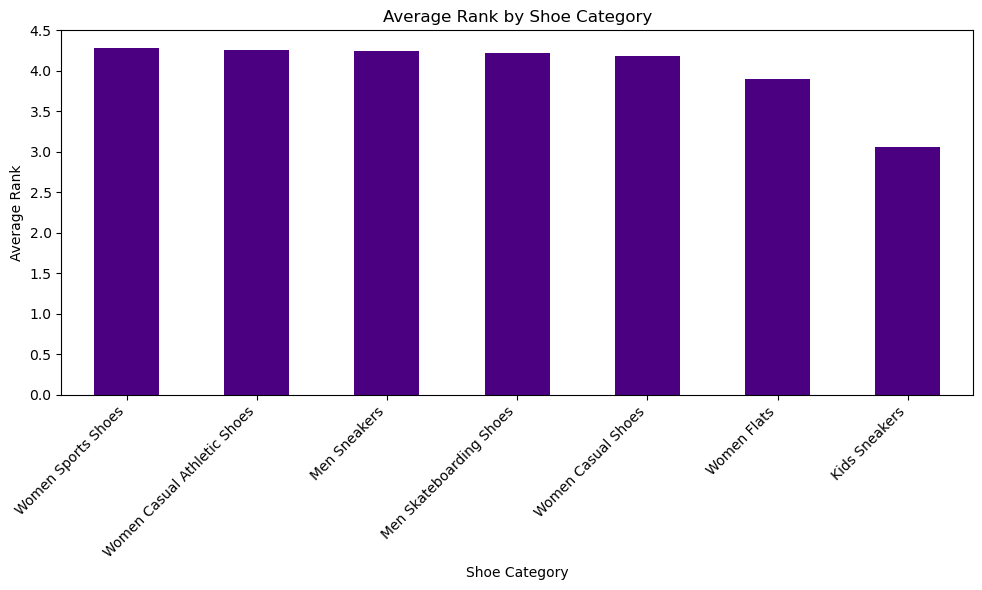

In [87]:
#Barplot for average rank for each category
plt.figure(figsize=(10, 6))
grouped_rank.plot(kind='bar', color='indigo')

plt.title('Average Rank by Shoe Category')
plt.xlabel('Shoe Category')
plt.ylabel('Average Rank')

plt.xticks(rotation=45, ha="right") 
plt.tight_layout() 
plt.show()

In [89]:
#statistical info of average rank per category
round(df1.groupby('cate_name')['comment_rank_average'].agg(['mean', 'median', 'count', 'max']),2)

,mean,median,count,max
cate_name,,,,
Dress Shoes,5.00,5.0,1,5
Kids Flats,0.00,0.0,1,0
Kids Sneakers,3.06,4.0,17,5
Men Canvas Shoes,5.00,5.0,1,5
Men Casual Athletic Shoes,4.00,4.0,3,4
Men Loafers,4.00,4.0,1,4
Men Skateboarding Shoes,4.21,4.0,14,5
Men Sneakers,4.25,4.0,28,5
Men Walking Shoes,5.00,5.0,1,5


In [91]:
#statistical info of average rank per category name of shoes for articles with at least 10 times rating on rank
rank_stats=round(df1.groupby('cate_name')['comment_rank_average'].agg(['mean', 'median', 'count', 'max']),2)
rank_stats[rank_stats['count'] > 10]

,mean,median,count,max
cate_name,,,,
Kids Sneakers,3.06,4.0,17,5
Men Skateboarding Shoes,4.21,4.0,14,5
Men Sneakers,4.25,4.0,28,5
Women Casual Athletic Shoes,4.26,4.0,31,5
Women Casual Shoes,4.19,4.0,70,5
Women Flats,3.90,4.0,20,5
Women Sports Shoes,4.29,4.0,28,5


In [93]:
#statistical info on number items sold per category (for at least 10 items sold)
Number_sold_stats=round(df1.groupby('cate_name')['Number items sold'].agg(['mean', 'median', 'count', 'max', 'sum']),2)
Number_sold_stats[Number_sold_stats['count'] > 10]

,mean,median,count,max,sum
cate_name,,,,,
Kids Sneakers,652.94,300.0,17,4000,11100
Men Skateboarding Shoes,312.86,300.0,14,800,4380
Men Sneakers,386.79,200.0,28,3000,10830
Women Casual Athletic Shoes,510.97,200.0,31,3000,15840
Women Casual Shoes,733.14,500.0,70,6000,51320
Women Flats,1190.00,700.0,20,5000,23800
Women Sports Shoes,757.50,750.0,28,2000,21210


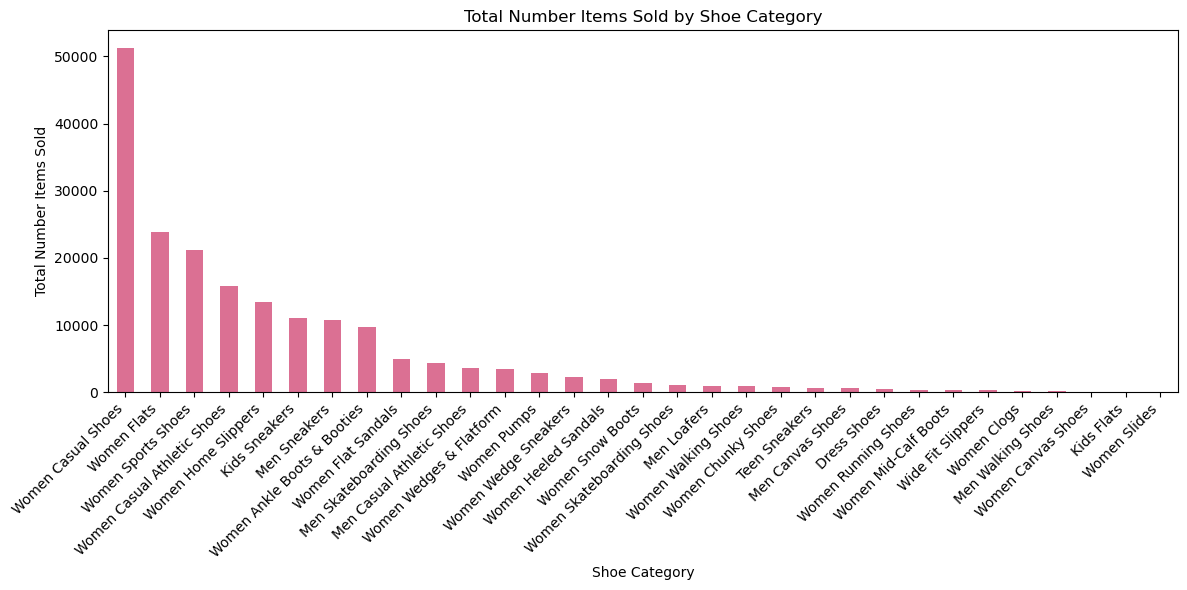

In [95]:
#Barplot for Number of items sold per extensive category (without filter on specific count)
cate_name_sales = df1.groupby('cate_name')['Number items sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cate_name_sales.plot(kind='bar', color='palevioletred')

plt.title('Total Number Items Sold by Shoe Category')
plt.xlabel('Shoe Category')
plt.ylabel('Total Number Items Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

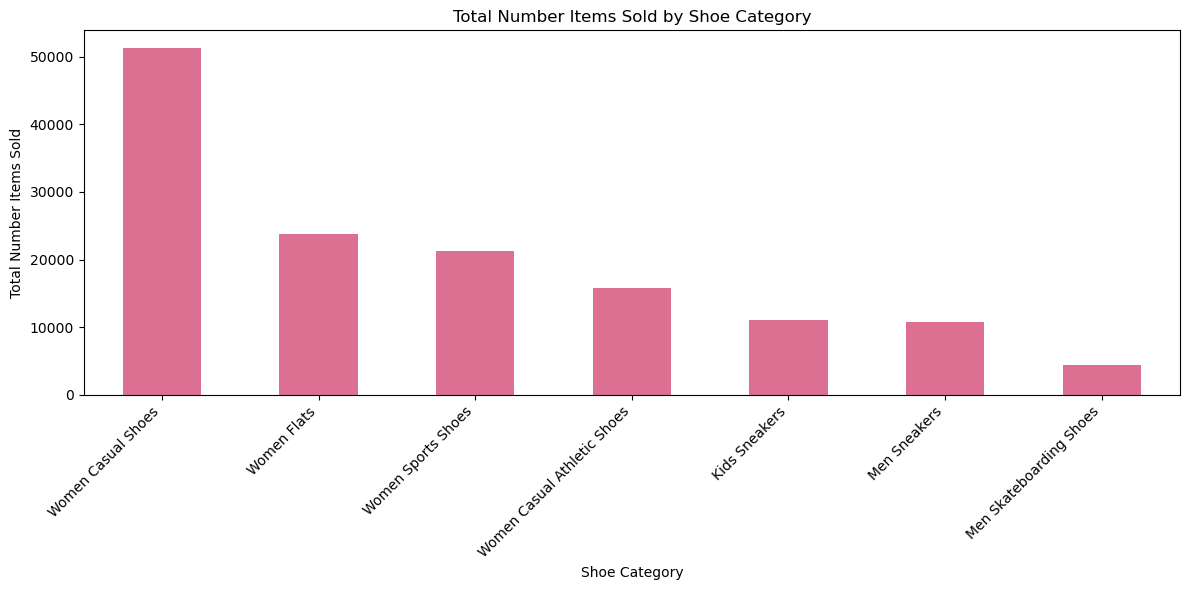

In [97]:
#Barplot for Number of items sold per article category shoes for reviews on average rank of at least 10
filtered_cate_names = df1.groupby('cate_name').filter(lambda x: x['comment_rank_average'].count() > 10)

cate_name_sales = filtered_cate_names.groupby('cate_name')['Number items sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cate_name_sales.plot(kind='bar', color='palevioletred')

plt.title('Total Number Items Sold by Shoe Category')
plt.xlabel('Shoe Category')
plt.ylabel('Total Number Items Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

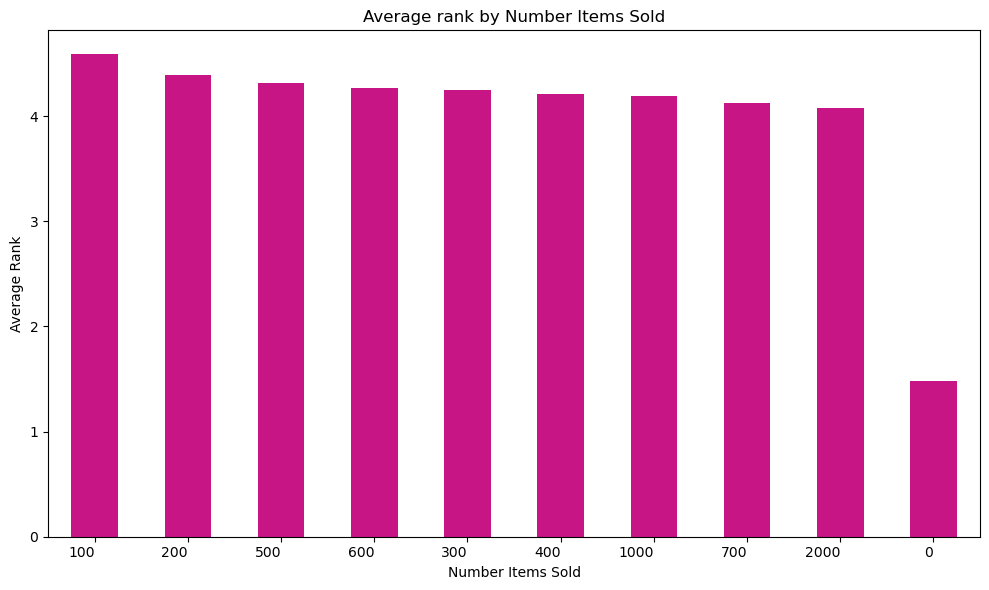

In [99]:
#Plot barchart for avergae rank by number items sold filtering for at least 10 reviews, rank and number items sold relatively have reverse relationship
filtered_number_sold = df1.groupby('Number items sold').filter(lambda x: x['comment_rank_average'].count() > 10)
grouped_data = filtered_number_sold.groupby('Number items sold')['comment_rank_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='mediumvioletred')

plt.title('Average rank by Number Items Sold')
plt.xlabel('Number Items Sold')
plt.ylabel('Average Rank')

plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

In [101]:
#statistical info on numbers items sold per shoe category
Number_sold_stats=round(df1.groupby('cate_name')['Number items sold'].agg(['mean', 'median', 'count', 'max', 'sum']),2)
Number_sold_stats[Number_sold_stats['count'] > 10]

,mean,median,count,max,sum
cate_name,,,,,
Kids Sneakers,652.94,300.0,17,4000,11100
Men Skateboarding Shoes,312.86,300.0,14,800,4380
Men Sneakers,386.79,200.0,28,3000,10830
Women Casual Athletic Shoes,510.97,200.0,31,3000,15840
Women Casual Shoes,733.14,500.0,70,6000,51320
Women Flats,1190.00,700.0,20,5000,23800
Women Sports Shoes,757.50,750.0,28,2000,21210


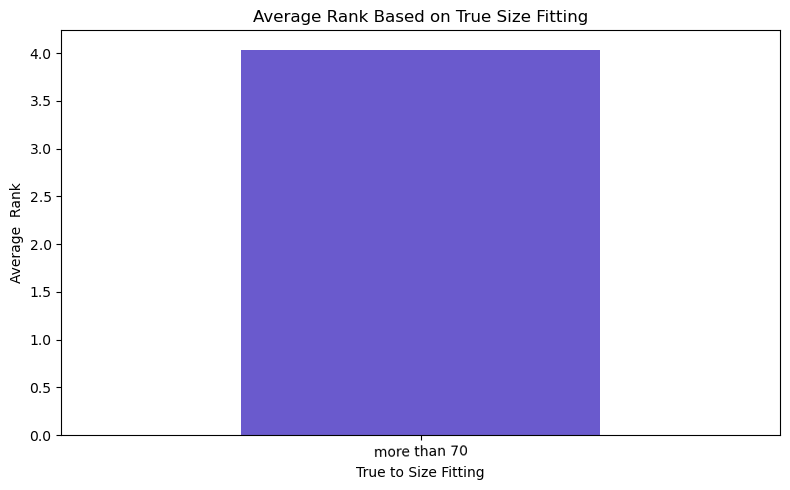

In [165]:
# checking hypothsis on percent overall size on ranking
#Footwear with more than 70% of percent overall fit true to size are more likely to have high ranking among customer
# create a new column that categorizes based on 'percent_overall_fit.true_size' 
df1['true_size_category'] = df1['percent_overall_fit.true_size'].apply(lambda x: 'more than 70' if x > 70 else 'less than 70')
filtered_data = df1.groupby('true_size_category').filter(lambda x: x['comment_rank_average'].count() > 10)
grouped_rank = filtered_data.groupby('true_size_category')['comment_rank_average'].mean()

# Bar plot
plt.figure(figsize=(8, 5))
grouped_rank.plot(kind='bar', color=['slateblue', 'plum'])
plt.title('Average Rank Based on True Size Fitting')
plt.xlabel('True to Size Fitting')
plt.ylabel('Average  Rank')

plt.xticks(rotation=1)
plt.tight_layout()
plt.show()
#Filtering on at least 10 reviews/rating validates the hypothsis

In [195]:
filtered_data.groupby('true_size_category')['comment_rank_average'].mean()

true_size_category
more than 70    4.038168
Name: comment_rank_average, dtype: float64

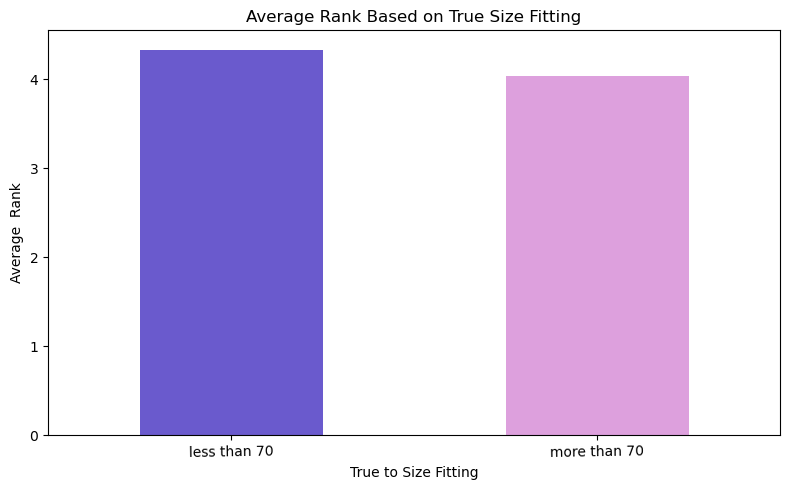

In [167]:
#Without filtering of at least 10 customer's rating, hypothesis is rejected. Few customers that rate footwear as not true to size, rank this footwear higher than those who rate it as true to size. 
df1['true_size_category'] = df1['percent_overall_fit.true_size'].apply(lambda x: 'more than 70' if x > 70 else 'less than 70')
grouped_rank = df1.groupby('true_size_category')['comment_rank_average'].mean()

# Bar plot
plt.figure(figsize=(8, 5))
grouped_rank.plot(kind='bar', color=['slateblue', 'plum'])
plt.title('Average Rank Based on True Size Fitting')
plt.xlabel('True to Size Fitting')
plt.ylabel('Average  Rank')

plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

In [193]:
df1.groupby('true_size_category')['comment_rank_average'].mean()

true_size_category
less than 70    4.333333
more than 70    4.038168
Name: comment_rank_average, dtype: float64

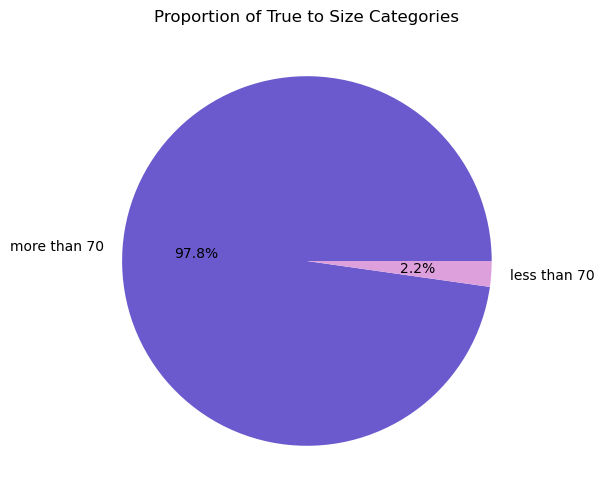

In [155]:
#Creating pie chart for proportion of True size to check the percentage of customer rating footwear as true to size
df1['true_size_category'] = df1['percent_overall_fit.true_size'].apply(lambda x: 'more than 70' if x > 70 else 'less than 70')
size_counts = df1['true_size_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=['slateblue', 'plum'])

plt.title('Proportion of True to Size Categories')
plt.show()

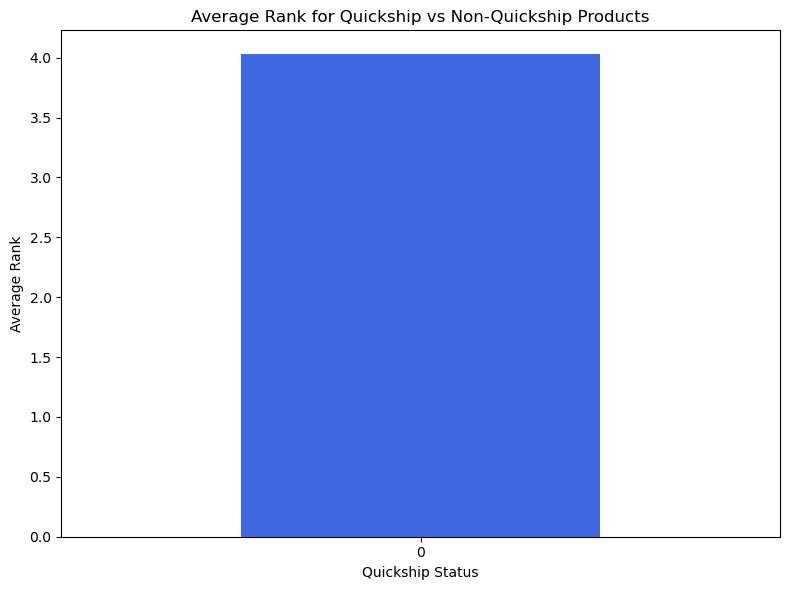

In [147]:
#Checking the relationship of the quick ship and comment rank average
#Hypothsis Faster delivery times increase the likelihood of footwear receiving higher customer rank.
#filtering on number of ranks of at least 10 ranks by customers
filtered_quick = df1.groupby('quickship').filter(lambda x: x['comment_rank_average'].count() > 10)
quickship_group = filtered_quick.groupby('quickship')['comment_rank_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
quickship_group.plot(kind='bar', color=['royalblue', 'violet'])

plt.title('Average Rank for Quickship vs Non-Quickship Products')
plt.xlabel('Quickship Status')
plt.ylabel('Average Rank')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [201]:
quickship_group

quickship
1    4.571429
0    3.981221
Name: comment_rank_average, dtype: float64

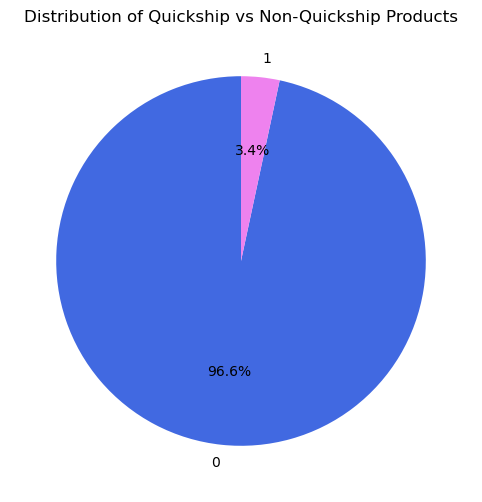

In [141]:
# Distribution of Quickship vs Non-Quickship Products
quickship_propo = df1['quickship'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(quickship_propo, labels=quickship_propo.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'violet'])

plt.title('Distribution of Quickship vs Non-Quickship Products')
plt.axis()

plt.show()

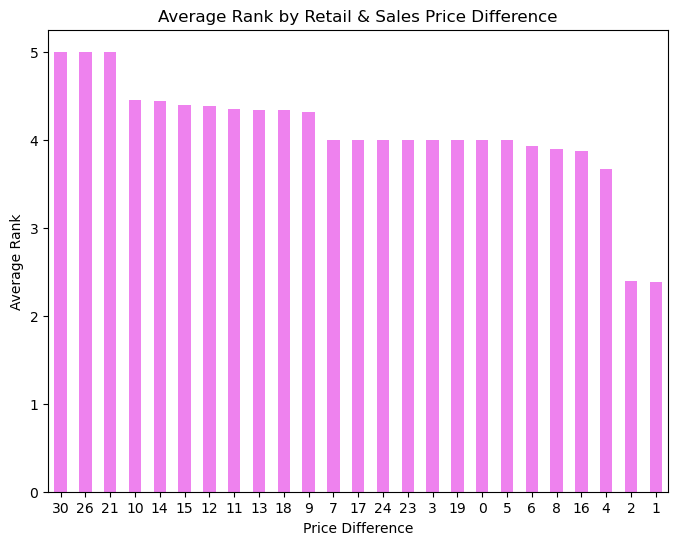

In [109]:
#Relationship between Retail and sales price difference (discount price) and average rank without filtering
price_diff_group = df1.groupby('discountprice.amount')['comment_rank_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
price_diff_group.plot(kind='bar', color='violet')

plt.title('Average Rank by Retail & Sales Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Average Rank')
plt.xticks(rotation=0)
plt.show()

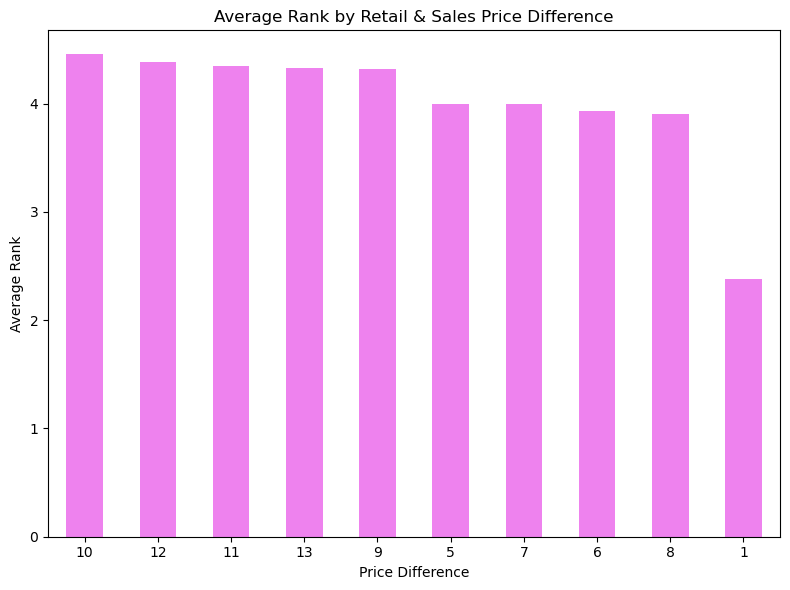

In [171]:
#Relationship between Retail and sales price difference (discount price) and average rank
#Filtering on at least 10 review/ rating of customer
filtered_discount = df1.groupby('discountprice.amount').filter(lambda x: x['comment_rank_average'].count() > 10)
price_diff_group = filtered_discount.groupby('discountprice.amount')['comment_rank_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
price_diff_group.plot(kind='bar', color='violet')
plt.title('Average Rank by Retail & Sales Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Average Rank')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [173]:
price_diff_group

discountprice.amount
10    4.454545
12    4.380952
11    4.350000
13    4.333333
9     4.318182
5     4.000000
7     4.000000
6     3.933333
8     3.900000
1     2.384615
Name: comment_rank_average, dtype: float64

In [111]:
round(df1.groupby('discountprice.amount')['Number items sold'].agg(['mean', 'median', 'count', 'max','sum']),2)

,mean,median,count,max,sum
discountprice.amount,,,,,
0,5000.00,5000.0,1,5000,5000
1,546.15,0.0,13,4000,7100
2,802.00,10.0,5,3000,4010
3,2034.44,1000.0,9,6000,18310
4,1655.56,1000.0,9,5000,14900
5,1135.29,1000.0,17,5000,19300
6,653.00,500.0,30,3000,19590
7,690.83,450.0,24,3000,16580
8,998.50,450.0,20,3000,19970


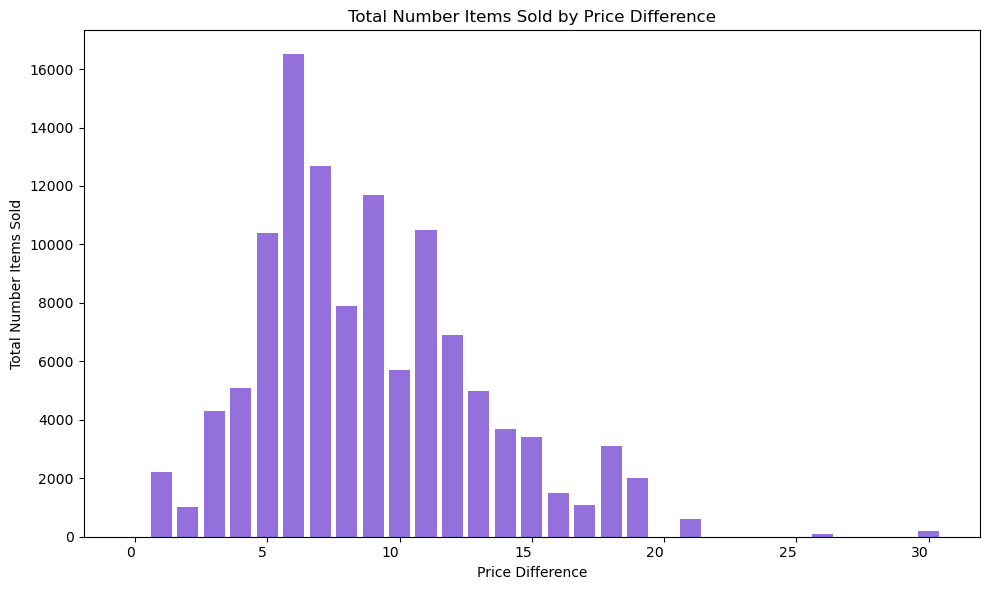

In [119]:
# Plot relationship between price_diff_group and Number items sold by filtering the rank with at least 10 customers
filtered_number_sold = df1.groupby('Number items sold').filter(lambda x: x['comment_rank_average'].count() > 10)
number_sold_article = filtered_number_sold.groupby('discountprice.amount')['Number items sold'].sum()
number_sold_article = number_sold_article.reindex(price_diff_group.index, fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(price_diff_group.index, number_sold_article, color='mediumpurple')
plt.title('Total Number Items Sold by Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Total Number Items Sold')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [127]:
number_sold_article.max()

16500

In [129]:
number_sold_article.idxmax()

6

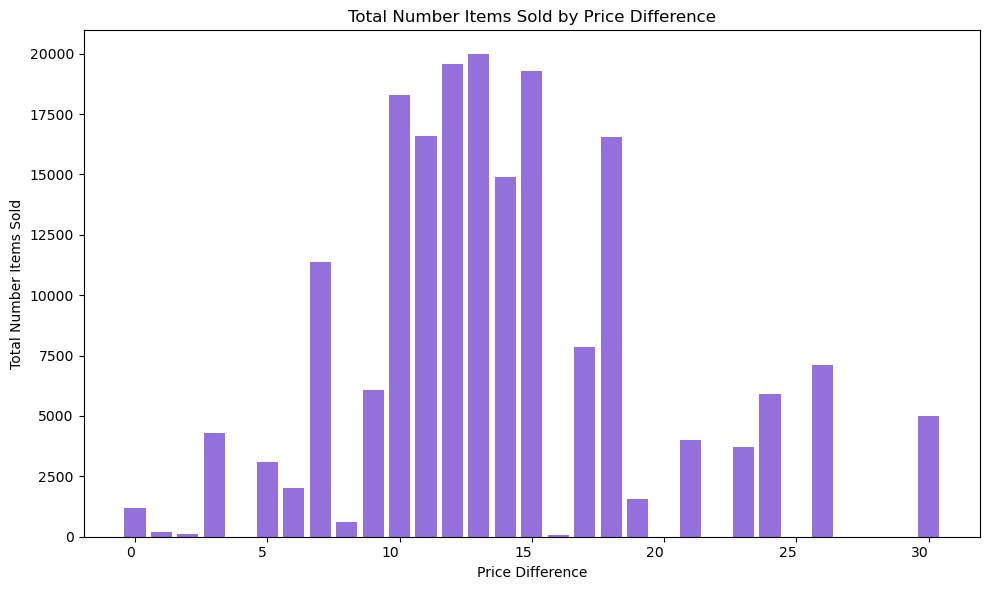

In [123]:
#relationship between price_diff_group and Number items sold without any filtering on number of times customer rank
number_sold = df1.groupby('discountprice.amount')['Number items sold'].sum()

plt.figure(figsize=(10, 6))
plt.bar(price_diff_group.index, number_sold, color='mediumpurple')
plt.title('Total Number Items Sold by Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Total Number Items Sold')

plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [125]:
# The value of the highest sales
number_sold.max()

19970

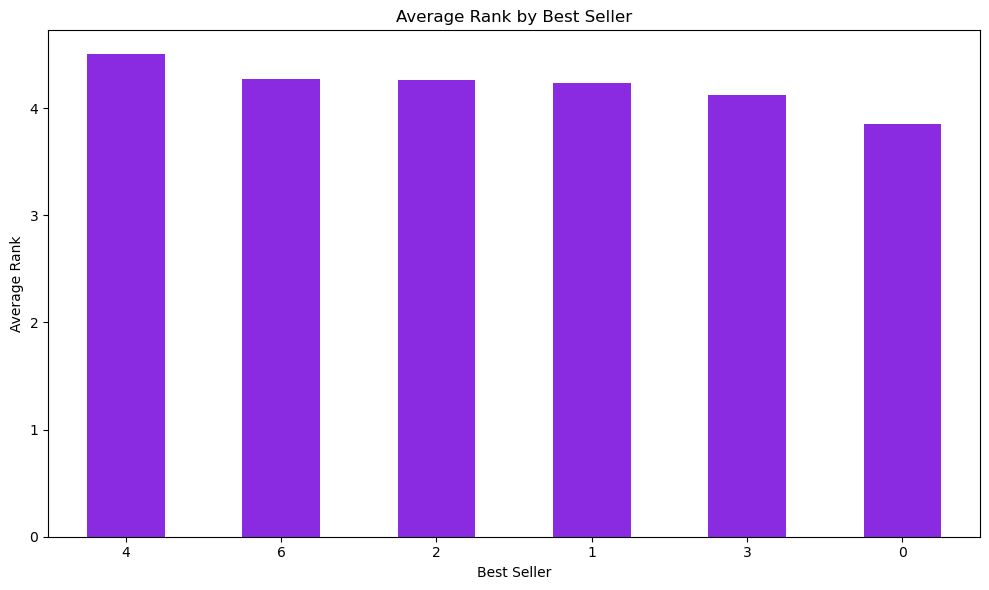

In [143]:
#Average Rank by Best Seller
filtered_best = df1.groupby('best_seller').filter(lambda x: x['comment_rank_average'].count() > 10)

average_rank_by_bestseller = filtered_best.groupby('best_seller')['comment_rank_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_rank_by_bestseller.plot(kind='bar', color='blueviolet')

plt.title('Average Rank by Best Seller')
plt.xlabel('Best Seller')
plt.ylabel('Average Rank')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

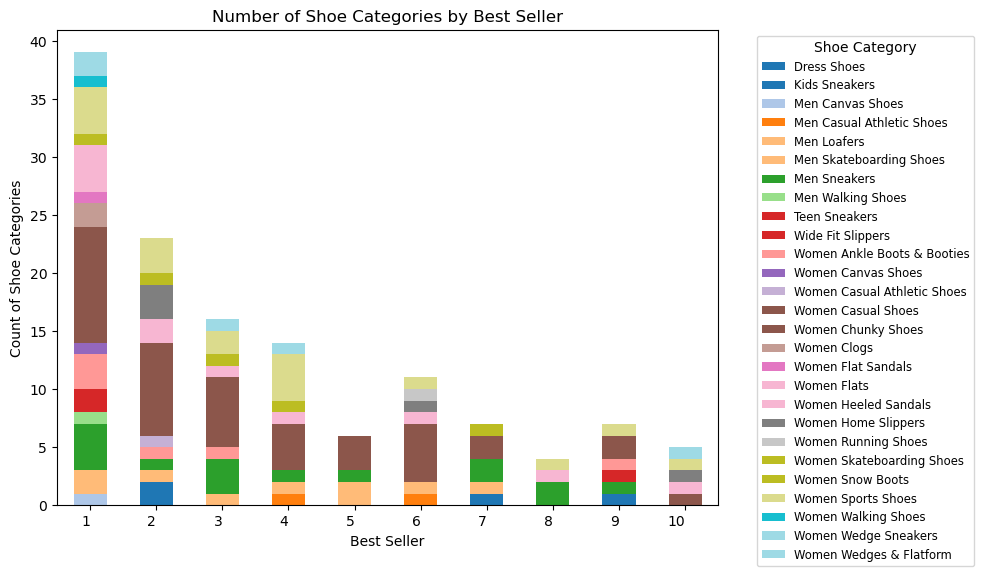

In [145]:
#Best Seller per shoe category
#Filter out the Non best seller or 0 best seller 
df1['best_seller'] = pd.to_numeric(df1['best_seller'], errors='coerce')
filtered_data = df1[df1['best_seller'] > 0]

# convert best seller to categorical data (e.g., 1st, 2nd, 3rd best seller)
filtered_data['best_seller'] = filtered_data['best_seller'].astype('category')

# count of times each category name appears in each best seller
bestseller_category_counts = filtered_data.groupby(['best_seller', 'cate_name']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
bestseller_category_counts.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.legend(title='Shoe Category', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
plt.title('Number of Shoe Categories by Best Seller')
plt.xlabel('Best Seller')
plt.ylabel('Count of Shoe Categories')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [179]:
bestseller_category_counts.sum().sort_values(ascending=False)

cate_name
Women Casual Shoes             39
Women Sports Shoes             17
Men Sneakers                   15
Women Flats                    10
Men Skateboarding Shoes         8
Women Ankle Boots & Booties     6
Women Home Slippers             5
Kids Sneakers                   3
Women Wedge Sneakers            3
Women Snow Boots                3
Women Skateboarding Shoes       2
Women Clogs                     2
Women Chunky Shoes              2
Women Wedges & Flatform         2
Teen Sneakers                   2
Men Casual Athletic Shoes       2
Women Casual Athletic Shoes     1
Women Canvas Shoes              1
Women Flat Sandals              1
Wide Fit Slippers               1
Women Heeled Sandals            1
Women Running Shoes             1
Men Walking Shoes               1
Men Loafers                     1
Women Walking Shoes             1
Men Canvas Shoes                1
Dress Shoes                     1
dtype: int64

In [149]:
round(df1.groupby('best_seller')['Number items sold'].agg(['mean', 'median', 'count', 'max', 'sum']),2)
#136 shoes are non-best seller
#39 shoes are first best seller

,mean,median,count,max,sum
best_seller,,,,,
0,523.75,200.0,136,6000,71230
1,1158.72,700.0,39,5000,45190
2,1296.09,1000.0,23,5000,29810
3,731.25,750.0,16,2000,11700
4,503.57,450.0,14,2000,7050
5,1016.67,700.0,6,3000,6100
6,434.55,400.0,11,1000,4780
7,471.43,400.0,7,1000,3300
8,300.00,300.0,4,500,1200


In [151]:
#Saving dataframe as csv file
df1.to_csv('shein.csv', index=False)